In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('C:\\Users\\user\\Downloads\\dataset\\NFLX.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
1,2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600
2,2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
3,2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000
4,2021-11-05,663.969971,665.640015,645.010010,645.719971,645.719971,5283500
5,2021-11-08,650.289978,656.000000,643.789978,651.450012,651.450012,2887500
6,2021-11-09,653.700012,660.500000,650.520020,655.989990,655.989990,2415600
7,2021-11-10,653.010010,660.330017,642.109985,646.909973,646.909973,2405800
8,2021-11-11,650.239990,665.820007,649.710022,657.580017,657.580017,2868300
9,2021-11-12,660.010010,683.340027,653.820007,682.609985,682.609985,4198400


In [4]:
df.reset_index(inplace=True)
df.head(10)

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
1,1,2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600
2,2,2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
3,3,2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000
4,4,2021-11-05,663.969971,665.640015,645.010010,645.719971,645.719971,5283500
5,5,2021-11-08,650.289978,656.000000,643.789978,651.450012,651.450012,2887500
6,6,2021-11-09,653.700012,660.500000,650.520020,655.989990,655.989990,2415600
7,7,2021-11-10,653.010010,660.330017,642.109985,646.909973,646.909973,2405800
8,8,2021-11-11,650.239990,665.820007,649.710022,657.580017,657.580017,2868300
9,9,2021-11-12,660.010010,683.340027,653.820007,682.609985,682.609985,4198400


In [5]:
corr = df.corr(method='pearson')
corr

,index,Open,High,Low,Close,Adj Close,Volume
index,1.000000,-0.846067,-0.845573,-0.842249,-0.843827,-0.843827,0.240106
Open,-0.846067,1.000000,0.999480,0.999408,0.998592,0.998592,-0.322860
High,-0.845573,0.999480,1.000000,0.999407,0.999381,0.999381,-0.317766
Low,-0.842249,0.999408,0.999407,1.000000,0.999355,0.999355,-0.334030
Close,-0.843827,0.998592,0.999381,0.999355,1.000000,1.000000,-0.323819
Adj Close,-0.843827,0.998592,0.999381,0.999355,1.000000,1.000000,-0.323819
Volume,0.240106,-0.322860,-0.317766,-0.334030,-0.323819,-0.323819,1.000000


<AxesSubplot:>

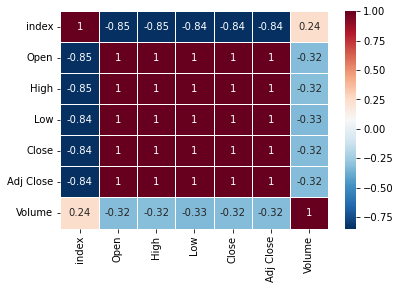

In [7]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='RdBu_r',annot=True,linewidth=0.5)

In [8]:
nflx_df = df[['Date','High','Open','Low','Close']]
nflx_df.head(10)

,Date,High,Open,Low,Close
0,2021-11-01,689.969971,689.059998,676.539978,681.169983
1,2021-11-02,687.679993,683.109985,673.820007,677.719971
2,2021-11-03,689.390015,677.270020,677.270020,688.289978
3,2021-11-04,685.940002,685.890015,665.500000,668.400024
4,2021-11-05,665.640015,663.969971,645.010010,645.719971
5,2021-11-08,656.000000,650.289978,643.789978,651.450012
6,2021-11-09,660.500000,653.700012,650.520020,655.989990
7,2021-11-10,660.330017,653.010010,642.109985,646.909973
8,2021-11-11,665.820007,650.239990,649.710022,657.580017
9,2021-11-12,683.340027,660.010010,653.820007,682.609985


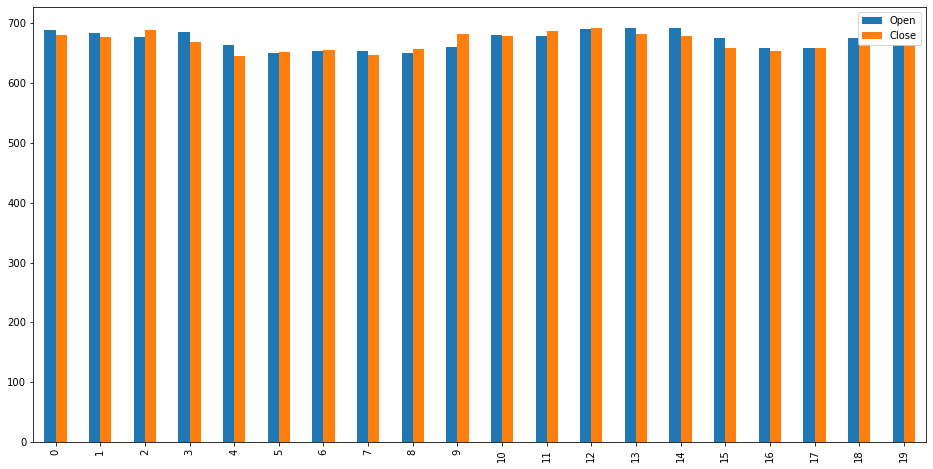

In [9]:
nflx_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.show()

In [10]:
df["Date"] = pd.to_datetime(df.Date,format='%Y-%m-%d')

In [11]:
nflx_df['Year']=df['Date'].dt.year
nflx_df['Month']=df['Date'].dt.month
nflx_df['Day']=df['Date'].dt.day

C:\Users\user\AppData\Local\Temp\ipykernel_8348\3215683321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nflx_df['Year']=df['Date'].dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_8348\3215683321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nflx_df['Month']=df['Date'].dt.month


In [12]:
nfx_df=nflx_df[['Day','Month','Year','High','Open','Low','Close']]
nfx_df.head(10)

,Day,Month,Year,High,Open,Low,Close
0,1,11,2021,689.969971,689.059998,676.539978,681.169983
1,2,11,2021,687.679993,683.109985,673.820007,677.719971
2,3,11,2021,689.390015,677.270020,677.270020,688.289978
3,4,11,2021,685.940002,685.890015,665.500000,668.400024
4,5,11,2021,665.640015,663.969971,645.010010,645.719971
5,8,11,2021,656.000000,650.289978,643.789978,651.450012
6,9,11,2021,660.500000,653.700012,650.520020,655.989990
7,10,11,2021,660.330017,653.010010,642.109985,646.909973
8,11,11,2021,665.820007,650.239990,649.710022,657.580017
9,12,11,2021,683.340027,660.010010,653.820007,682.609985


In [13]:
x = nfx_df.iloc[:,nfx_df.columns !='Close']
y = nfx_df.iloc[:,6]

In [14]:
print(x.shape)
print(y.shape)

(251, 6)
(251,)


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = reg.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9993445307375239

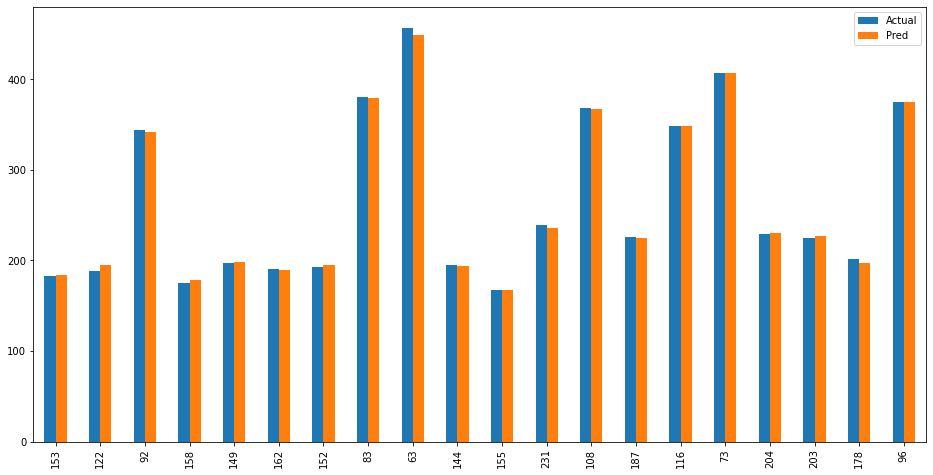

In [21]:
plot_df = pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.show()